# Single Cell RNA-Seq

In this tutorial we are going to run through how UCDeconvolve can be used to aid in the analysis and annotation of
single-cell RNA-Sequencing data. For this tutorial, we are going to use the 'pbmc3k' dataset provided in the scanpy
datasets model at ``sc.datasets.pbmc3k()``. 

## Loading Packages & Authenticating
The first step in this analysis will be to load scanpy and ucdeconvolve, and
authenticate our API. In this tutorial we saved our user access token in the variable ``TOKEN``.

In [1]:
import warnings
warnings.filterwarnings("ignore")
TOKEN = "uc_qEmnBsxREvBHtL80FI7KTPfJ03yhvZ3iv3YGbDkYd8PU51r4"

In [2]:
import scanpy as sc
import ucdeconvolve as ucd

ucd.api.authenticate(TOKEN)

2023-04-25 12:04:02,684|[UCD]|INFO: Updated valid user access token.


%%eval-rst
|
.. note::
   By default the logging level is set to ``DEBUG``. To change logging levels you can import ``logging`` and set
   ``ucd.settings.verbosity`` directly. To reduce logs, change ``verbosity`` to ``logging.INFO``. In general we
   recommend keeping logging to ``DEBUG`` to provide status updates on a running deconvolution job.

## Loading & Preprocessing Data
We will now begin by loading our pbmc dataset.

In [3]:
adata = sc.datasets.pbmc3k()

We will save raw counts data into adata, which can serve as an input to ucd functions. Unicell will detect non-logarithmized
counts data and automatically normalize our data. We will run a quick built-in preprocssing functions using scanpy to
obtain some clustered data. This step will take a minute or two to complete.

In [ ]:
adata.raw = adata

sc.pp.recipe_seurat(adata)

sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors = 30)
sc.tl.umap(adata, min_dist = 0.1)
sc.tl.leiden(adata)

We plot the UMAP of our dataset using leiden clusters as an overlay and see the following image:

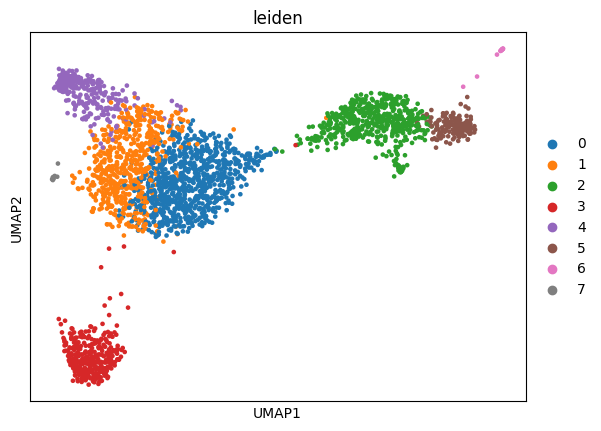

In [6]:
sc.pl.umap(adata, color = 'leiden')

## Running UCDBase 
To get a general sense of the celltypes most likely present in this dataset, we want to first run ``ucd.tl.base`` which
will return context-free deconvolutions of cell type states.

In [ ]:
ucd.tl.base(adata)